<a href="https://colab.research.google.com/github/imanekn/Fake-News-Detection/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string
import re

import nltk
#from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')


In [ ]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
data.describe()

,id
count,6420.000000
mean,3210.500000
std,1853.438696
min,1.000000
25%,1605.750000
50%,3210.500000
75%,4815.250000
max,6420.000000


In [ ]:
data.dtypes

id        int64
tweet    object
label    object
dtype: object

In [ ]:
#Check if there are any missing values
data.isna().sum()

id       0
tweet    0
label    0
dtype: int64

In [ ]:
#Remove missing data
data.dropna()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [ ]:
l1 = data['label'] == 'fake'
l2 = data['label'] == 'real'
data.loc[l1,'label'] = 0
data.loc[l2,'label'] = 1
data

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,1
1,2,States reported 1121 deaths a small rise from ...,1
2,3,Politically Correct Woman (Almost) Uses Pandem...,0
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,1
4,5,Populous states can generate large case counts...,1
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,0
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,0
6417,6418,_A post claims a COVID-19 vaccine has already ...,0
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,0


**Plotting**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(8,7)})

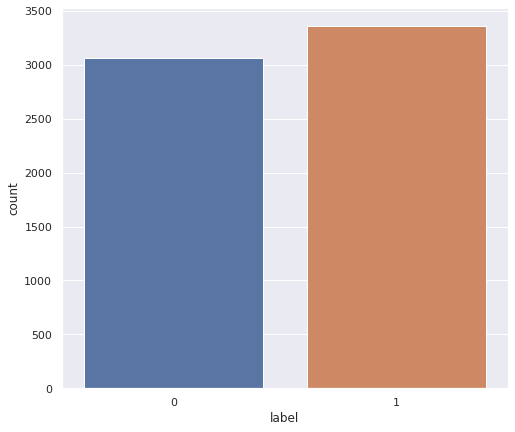

In [ ]:
sns.countplot(x='label', data=data)

### **DATA CLEANING**





In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

*Using the function below, we will clean our text :*

In [93]:
def preprocess(text):

  lemmatizer = WordNetLemmatizer()
  stop_words = stopwords.words('english')

  #Lowercase
  text = text.lower()

  #Removing urls
  text = re.sub(r'https\S+', '', text, flags=re.MULTILINE)

  #Removing usernames
  text = re.sub(r'@\S+', '', text, flags=re.MULTILINE)

  #Removing tags
  text = re.sub(r'#\S+', '', text, flags=re.MULTILINE)

  #Removing punctuation
  text = text.translate(str.maketrans('', '', string.punctuation))

  #Removing Non Alpha Numeric characters 
  text = re.sub('[^a-zA-Z]+', ' ', text) 

  #Removing stopwords
  text_tokens = word_tokenize(text)
  text = [word for word in text_tokens if word not in stop_words]
  text = " ".join(text)

  #Lemmatization
  text = [lemmatizer.lemmatize(word) for word in text] # Lemmatizing
  text = "".join(text)

  return text


In [99]:
def data_preprocess(x):
  x = x.apply(lambda x : preprocess(x))

  y = x.copy(deep=True)
  for i in range(y.shape[0]):
    y[i] = "".join(x[i])

  return y

In [102]:
data["tweet"] = data_preprocess(data["tweet"])
data["tweet"]

0       cdc currently reports deaths general discrepan...
1       states reported deaths small rise last tuesday...
2       politically correct woman almost uses pandemic...
3       testing laboratories india th august tests don...
4       populous states generate large case counts loo...
                              ...                        
6415    tiger tested positive covid please stay away p...
6416    autopsies prove covid blood clot pneumonia oug...
6417    post claims covid vaccine already developed ca...
6418            aamir khan donate cr pm relief cares fund
6419    days since last case covid acquired locally un...
Name: tweet, Length: 6420, dtype: object

In [101]:
data = pd.read_excel('Data-FakeRealCOVID.xlsx')

In [ ]:
data["tweet"][1595]

In [ ]:
data["tweet"] = preprocess(data["tweet"])
data["tweet"]

In [ ]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
data["tweet"][1595]

In [ ]:
data['tweet'][0]

In [ ]:
d=word_tokenize(data['tweet'][0])
d

In [ ]:
data['tweet'][123]

In [ ]:
data['tweet'][30]

In [ ]:
#Loading preprocessed data
data.to_csv("Data-FakeRealCOVID.csv", index=False)

### **Feature Extraction**



In [ ]:
df = pd.read_csv("Data-FakeRealCOVID.csv")
df


In [ ]:
df.dropna()

In [ ]:
tweets = df['tweet']
big_string = ''
for i in range(len(tweets)):
  big_string += str(tweets[i])

big_string = clean(big_string)

big_string


In [ ]:
print(len(big_string))

In [ ]:
row_has_NaN = df.isnull().any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN 

In [ ]:
df = df.dropna()

In [ ]:
x = df["tweet"]
y = df["label"]
#Creation of TF-IDF Object
tfidf_vectorizer = TfidfVectorizer(stop_words="english") 

#Transform the train dataset 
tfidf_x = tfidf_vectorizer.fit_transform(x)

#Transform the test dataset 
#tfidf_y = tfidf_vectorizer.fit_transform(y)

# Splitting data
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
x = df["tweet"]
x

0       cdc currently report death general discrepancy...
1       state reported death small rise last tuesday s...
2       politically correct woman almost us pandemic e...
3       indiafightscorona covid testing laboratory ind...
4       populous state generate large case count look ...
                              ...                        
6415    tiger tested positive covid please stay away p...
6416    autopsy prove covid blood clot pneumonia ought...
6417    post claim covid vaccine already developed cau...
6418             aamir khan donate cr pm relief care fund
6419    day since last case covid acquired locally unk...
Name: tweet, Length: 6418, dtype: object

In [ ]:
print(tfidf_x)

  (0, 10166)	0.14874400246261643
  (0, 7393)	0.12868569223798754
  (0, 8687)	0.2870169514604283
  (0, 9488)	0.22804380576028158
  (0, 10179)	0.24306481698798252
  (0, 3588)	0.35341449207677594
  (0, 9277)	0.24666262789223906
  (0, 9371)	0.2304537657128574
  (0, 2825)	0.22804380576028158
  (0, 2269)	0.23391814519648393
  (0, 2890)	0.3264173842437325
  (0, 4120)	0.2535133219764441
  (0, 2554)	0.38587493204610834
  (0, 8423)	0.14998385018246732
  (0, 2438)	0.21664473591017186
  (0, 1511)	0.18201719349432088
  (1, 9377)	0.4335990359703104
  (1, 10348)	0.3844073056008557
  (1, 8615)	0.31831563767571314
  (1, 8424)	0.42637918904459543
  (1, 9502)	0.3517757838895399
  (1, 9277)	0.35110064568828053
  (1, 2554)	0.36617069220959936
  (2, 830)	0.34828394840304144
  (2, 7541)	0.38143532961844445
  :	:
  (6415, 2306)	0.10766018080330281
  (6416, 3012)	0.4107548420926154
  (6416, 2340)	0.37435161381480486
  (6416, 8360)	0.37435161381480486
  (6416, 7)	0.41885064417378115
  (6416, 5548)	0.36115289244

In [ ]:
tfidf_x.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(tfidf_y)

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (6393, 1)	1.0
  (6394, 0)	1.0
  (6395, 0)	1.0
  (6396, 1)	1.0
  (6397, 0)	1.0
  (6398, 1)	1.0
  (6399, 1)	1.0
  (6400, 1)	1.0
  (6401, 1)	1.0
  (6402, 1)	1.0
  (6403, 1)	1.0
  (6404, 0)	1.0
  (6405, 0)	1.0
  (6406, 0)	1.0
  (6407, 0)	1.0
  (6408, 0)	1.0
  (6409, 1)	1.0
  (6410, 0)	1.0
  (6411, 0)	1.0
  (6412, 1)	1.0
  (6413, 0)	1.0
  (6414, 0)	1.0
  (6415, 0)	1.0
  (6416, 0)	1.0
  (6417, 1)	1.0


In [ ]:
df.head()

,id,tweet,label
0,1,cdc currently report death general discrepancy...,real
1,2,state reported death small rise last tuesday s...,real
2,3,politically correct woman almost us pandemic e...,fake
3,4,indiafightscorona covid testing laboratory ind...,real
4,5,populous state generate large case count look ...,real


In [ ]:
tfidf_vectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aadajoli',
 'aaiofficial',
 'aaj',
 'aajtak',
 'aamaadmiparty',
 'aamctoday',
 'aamir',
 'aampe',
 'aampes',
 'aaradhya',
 'ababa',
 'abacha',
 'abakaliki',
 'aball',
 'abandon',
 'abandoned',
 'abating',
 'abbasi',
 'abbott',
 'abbottnews',
 'abbreviation',
 'abc',
 'abcworldnews',
 'abdicated',
 'abdul',
 'abdulaziz',
 'abhi',
 'abhigyan',
 'abhishek',
 'abia',
 'abide',
 'ability',
 'able',
 'abledoc',
 'ableg',
 'abnormally',
 'aboard',
 'abortion',
 'abou',
 'abound',
 'aboveinflation',
 'aboveremained',
 'abpnews',
 'abraham',
 'abruptly',
 'abscbn',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'abt',
 'abubakar',
 'abuja',
 'abundantly',
 'abysmal',
 'ac',
 'aca',
 'academic',
 'academy',
 'acalabrutinib',
 'acc',
 'accelerate',
 'accelerates',
 'accelerating',
 'accelerator',
 'acceleratordrtedros',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessdrtedros',
 'accessibility',
 'accessible',
 'accident',
 'accidental'

In [ ]:
len(tfidf_vectorizer.vocabulary_) #there are 4543 unique words

11173

In [ ]:
tfidf_vectorizer.vocabulary_ #la conversion des mots en num

{'cdc': 1511,
 'currently': 2438,
 'report': 8423,
 'death': 2554,
 'general': 4120,
 'discrepancy': 2890,
 'count': 2269,
 'different': 2825,
 'source': 9371,
 'small': 9277,
 'explicable': 3588,
 'toll': 10179,
 'stand': 9488,
 'roughly': 8687,
 'people': 7393,
 'today': 10166,
 'state': 9502,
 'reported': 8424,
 'rise': 8615,
 'tuesday': 10348,
 'southern': 9377,
 'politically': 7612,
 'correct': 2240,
 'woman': 11021,
 'pandemic': 7243,
 'excuse': 3529,
 'reuse': 8541,
 'plastic': 7541,
 'bag': 830,
 'indiafightscorona': 4999,
 'covid': 2306,
 'testing': 10010,
 'laboratory': 5650,
 'india': 4995,
 'th': 10020,
 'august': 734,
 'test': 10003,
 'profbhargava': 7867,
 'dg': 2782,
 'icmrdelhi': 4805,
 'staysafe': 9542,
 'indiawillwin': 5010,
 'populous': 7642,
 'generate': 4122,
 'large': 5693,
 'case': 1456,
 'look': 5935,
 'new': 6787,
 'million': 6393,
 'smaller': 9278,
 'showing': 9166,
 'california': 1366,
 'texas': 10017,
 'al': 302,
 'ar': 561,
 'id': 4812,
 'ky': 5639,
 'la': 

In [ ]:
len(tfidf_vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


11173

In [ ]:
print(tfidf_x) # le premier couple designe que le tweet 0 , l feature equivalent au num 2290 y contribue avec une frequence de 0,13 (signifigant)

  (0, 10166)	0.14874400246261643
  (0, 7393)	0.12868569223798754
  (0, 8687)	0.2870169514604283
  (0, 9488)	0.22804380576028158
  (0, 10179)	0.24306481698798252
  (0, 3588)	0.35341449207677594
  (0, 9277)	0.24666262789223906
  (0, 9371)	0.2304537657128574
  (0, 2825)	0.22804380576028158
  (0, 2269)	0.23391814519648393
  (0, 2890)	0.3264173842437325
  (0, 4120)	0.2535133219764441
  (0, 2554)	0.38587493204610834
  (0, 8423)	0.14998385018246732
  (0, 2438)	0.21664473591017186
  (0, 1511)	0.18201719349432088
  (1, 9377)	0.4335990359703104
  (1, 10348)	0.3844073056008557
  (1, 8615)	0.31831563767571314
  (1, 8424)	0.42637918904459543
  (1, 9502)	0.3517757838895399
  (1, 9277)	0.35110064568828053
  (1, 2554)	0.36617069220959936
  (2, 830)	0.34828394840304144
  (2, 7541)	0.38143532961844445
  :	:
  (6415, 2306)	0.10766018080330281
  (6416, 3012)	0.4107548420926154
  (6416, 2340)	0.37435161381480486
  (6416, 8360)	0.37435161381480486
  (6416, 7)	0.41885064417378115
  (6416, 5548)	0.36115289244

In [ ]:
tfidf_x.shape[1]

11173

In [ ]:
training=tfidf_x.toarray()
training

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
'''
feature_names = tfidf_vectorizer.get_feature_names()
for col in tfidf_train.nonzero()[1]:
  print(feature_names[col], '-' , tfidf_train[0,col])
'''

In [ ]:
from torch import nn 

In [ ]:
class ResNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(16*3, 50)
    self.l2 = nn.Linear(50, 50)
    self.do = nn.Dropout(0.1)
    self.l3 = nn.Linear(50, 10)
  def forward(self, x):
    h1 = nn.functional.relu(self.l1(x))
    h2 = nn.functional.relu(self.l2(h1))
    do = self.do(h2 + h1)
    output = self.l3(do)
    return output

model = ResNet()

In [ ]:
type(tfidf_train) 

In [ ]:
import scipy.sparse
training=pd.DataFrame.sparse.from_spmatrix(tfidf_train)
training

In [ ]:
import scipy.sparse
test=pd.DataFrame.sparse.from_spmatrix(tfidf_test)
test

In [ ]:
import torch 
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from torch.utils.data import Dataset ,DataLoader

In [ ]:
training.toarray()

In [ ]:
test.to_csv('test.csv', index=False)

In [ ]:
News = pd.read_csv('Data-FakeRealCOVID.csv')
News.astype(float)
News


In [ ]:
X=training.iloc[:,:-1].values

Y=training.iloc[:,-1].values

In [ ]:

import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
def f(x, y):
    return x ** 2 + y ** 2

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour(X, Y, Z, 50, cmap='binary', color="r")
ax.set_xlabel('features')
ax.set_ylabel('output')
ax.set_zlabel('error')

ax.view_init(30, 30)

In [ ]:
import torch.nn.functional as F